In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

## **Data Collection**


In [61]:
df = pd.read_csv('/kaggle/input/housing-prices-regression/real_estate_dataset.csv')

## **Data Representation**

In [62]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


## **Data Wrangling**

### **Drop Unneeded Columns**

In [64]:
df.drop(columns=['ID'], inplace=True)

In [65]:
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


### **Hanlde Missing Values**

In [66]:
df.isna().sum()

Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

### **Drop Duplicated Values**

In [67]:
df.duplicated().sum()

0

## ****Dara Analysis****

In [68]:
df.sample(8)

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
362,164.563223,1,1,1,2013,1,0,20,7.723010,2.340234,544960.761359
452,156.055502,2,3,2,1904,0,0,33,1.118806,15.467621,359887.850280
405,273.880807,2,3,3,1900,0,1,46,5.970958,15.033523,623398.307832
175,93.591607,5,2,1,2008,1,0,26,4.632937,13.335438,657068.887652
155,110.513818,1,3,3,1920,1,1,37,8.888874,9.230459,478489.299027
448,144.064896,2,2,1,1923,1,1,19,7.129600,15.074681,484303.857494
328,154.900016,2,3,2,1962,0,0,37,0.740422,14.133511,474291.059471
71,99.678920,4,1,2,1935,0,1,39,5.225397,9.585202,511009.696731


### **Univariate**

### **Num_Bedrooms**

In [69]:
df['Num_Bedrooms'].value_counts()

Num_Bedrooms
1    109
5    105
3    105
2     97
4     84
Name: count, dtype: int64

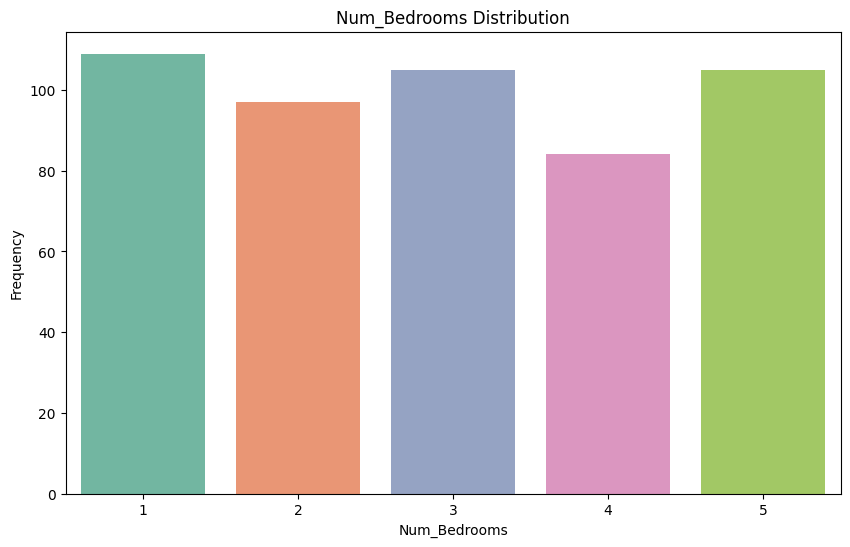

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Num_Bedrooms'].value_counts().index, y=df['Num_Bedrooms'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Num_Bedrooms Distribution')
plt.xlabel('Num_Bedrooms')
plt.ylabel('Frequency')

plt.show()

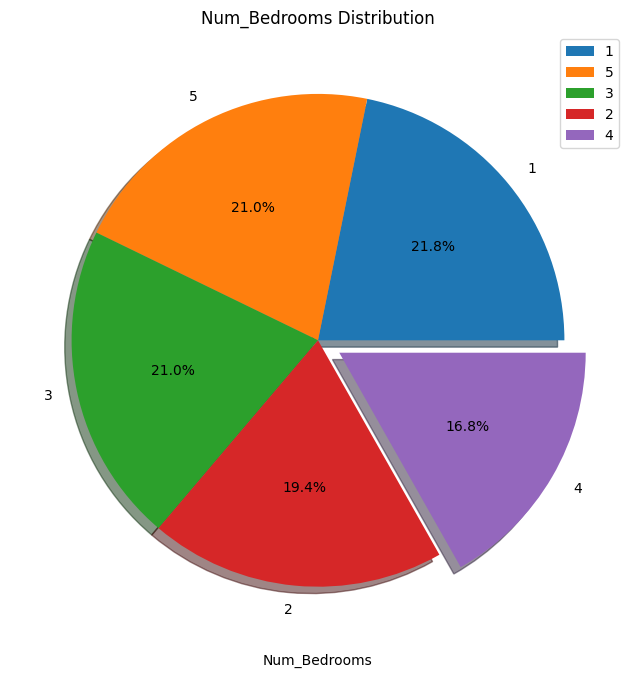

In [71]:
plt.figure(figsize=(10, 8))
plt.pie(df['Num_Bedrooms'].value_counts(), explode = [0,0,0,0,0.1] , labels=df['Num_Bedrooms'].value_counts().index, shadow=True, autopct="%1.1f%%")
plt.title('Num_Bedrooms Distribution')
plt.xlabel('Num_Bedrooms')
plt.legend()
plt.show()

### **Num_Floors**

In [72]:
df['Num_Floors'].value_counts()

Num_Floors
2    178
1    170
3    152
Name: count, dtype: int64

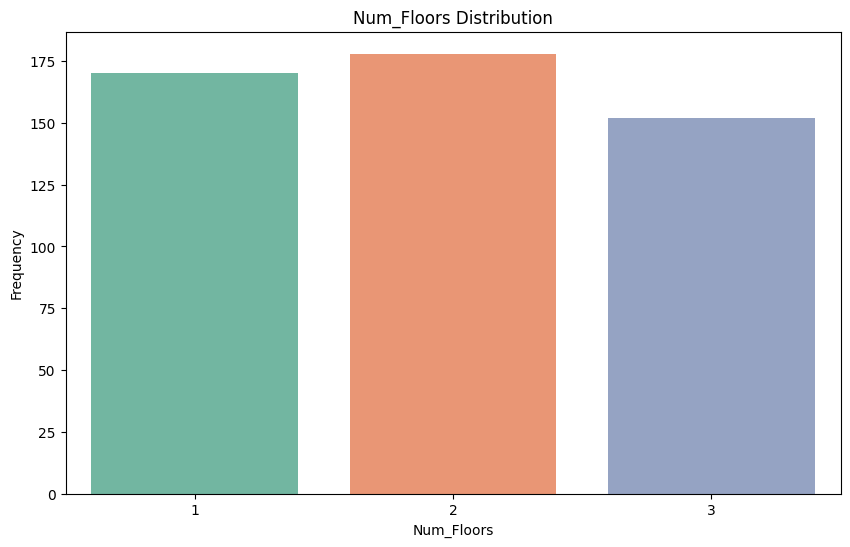

In [73]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Num_Floors', color='green',  palette=sns.color_palette("Set2"))
plt.title('Num_Floors Distribution')
plt.xlabel('Num_Floors')
plt.ylabel('Frequency')
plt.show()


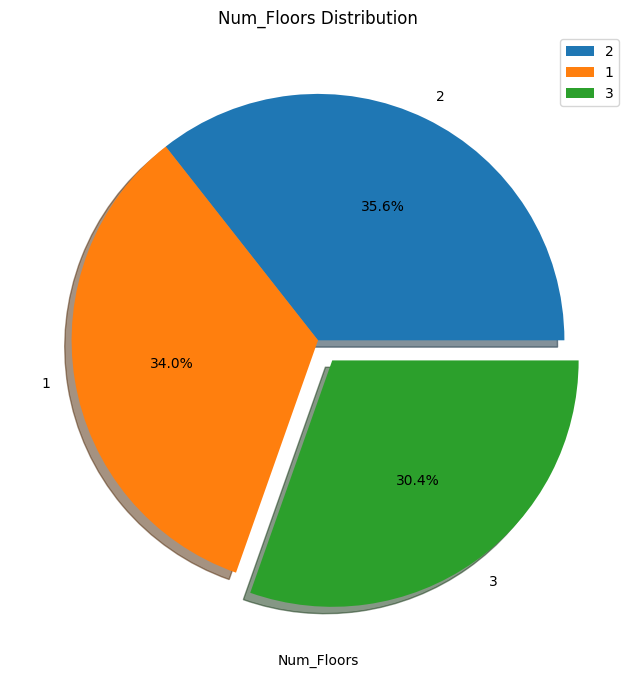

In [74]:
plt.figure(figsize=(10, 8))
plt.pie(df['Num_Floors'].value_counts(), explode = [0,0,0.1] , labels=df['Num_Floors'].value_counts().index, shadow=True, autopct="%1.1f%%")
plt.title('Num_Floors Distribution')
plt.xlabel('Num_Floors')
plt.legend()
plt.show()

### **Num of Bathrooms**

In [75]:
df['Num_Bathrooms'].value_counts()

Num_Bathrooms
1    174
2    164
3    162
Name: count, dtype: int64

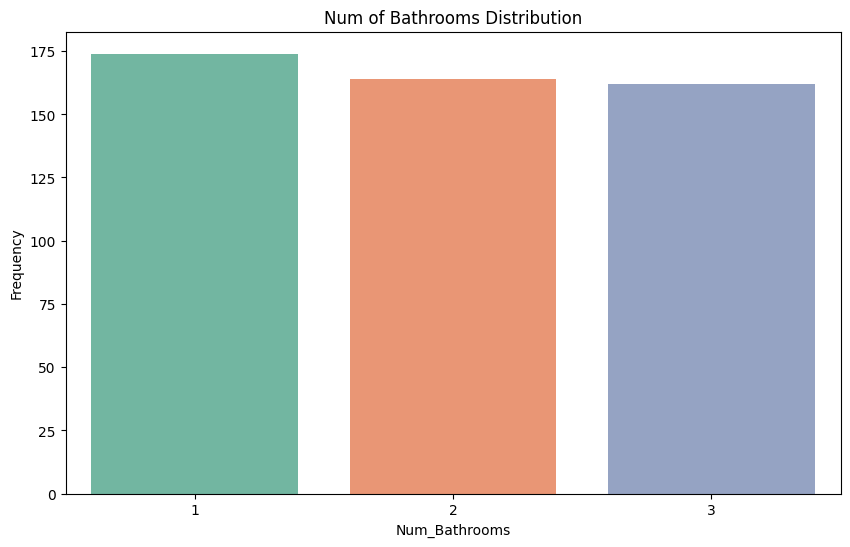

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Num_Bathrooms'].value_counts().index, y=df['Num_Bathrooms'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Num of Bathrooms Distribution')
plt.xlabel('Num_Bathrooms')
plt.ylabel('Frequency')

plt.show()

### **Year_Built**

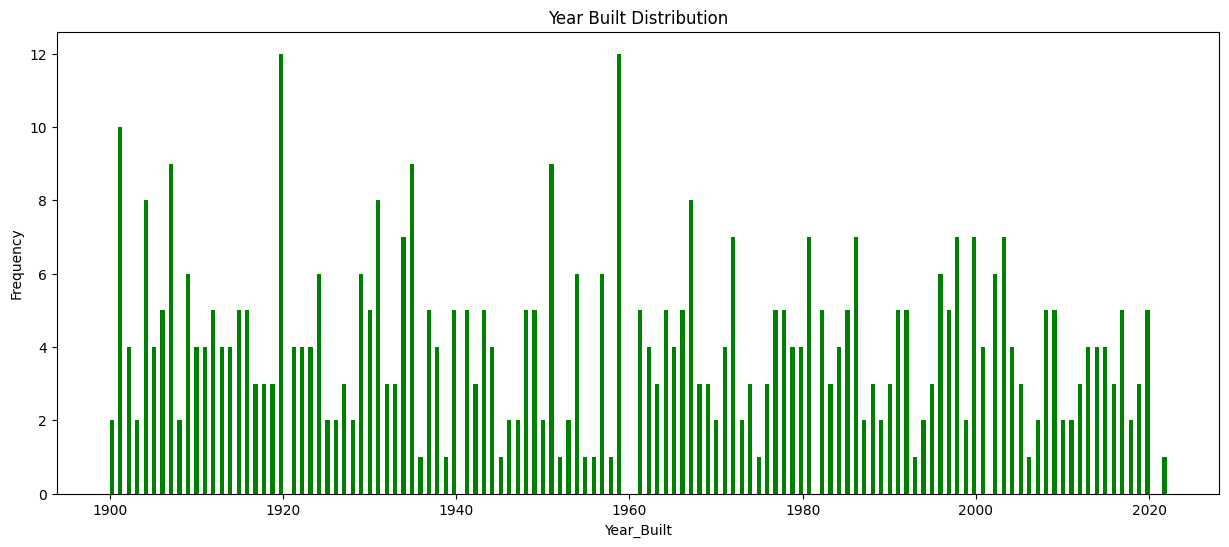

In [130]:
plt.figure(figsize=(15, 6))
plt.hist(df['Year_Built'],bins=250, color='green')
plt.title('Year Built Distribution')
plt.xlabel('Year_Built')
plt.ylabel('Frequency')

plt.show()

### ****

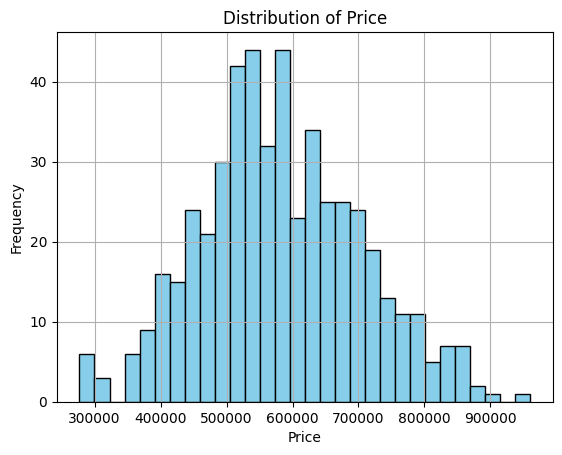

In [78]:
df['Price'].plot(kind='hist', bins=30, title='Distribution of Price', color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.grid(True)
plt.show()

### **Square_Feet**

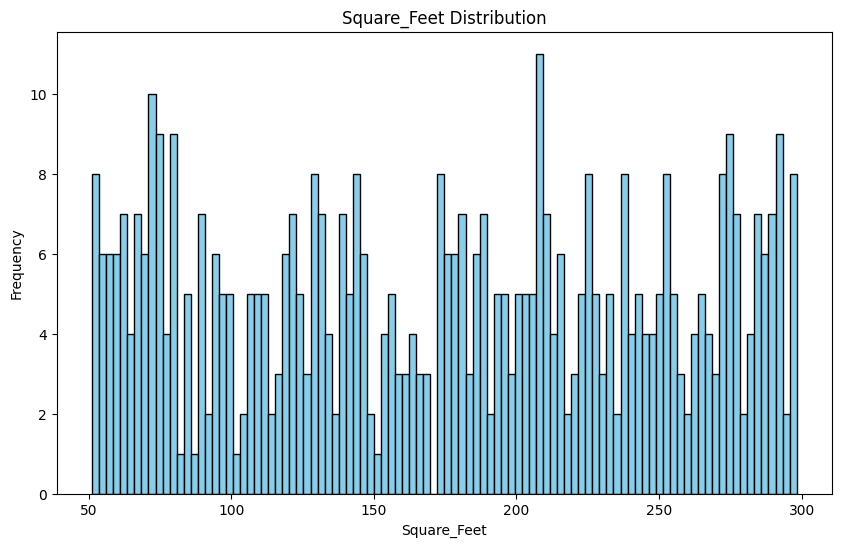

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(df['Square_Feet'], bins=100, color='skyblue',edgecolor='black')
plt.title('Square_Feet Distribution')
plt.xlabel('Square_Feet')
plt.ylabel('Frequency')
plt.show()

### **Garage_Size**

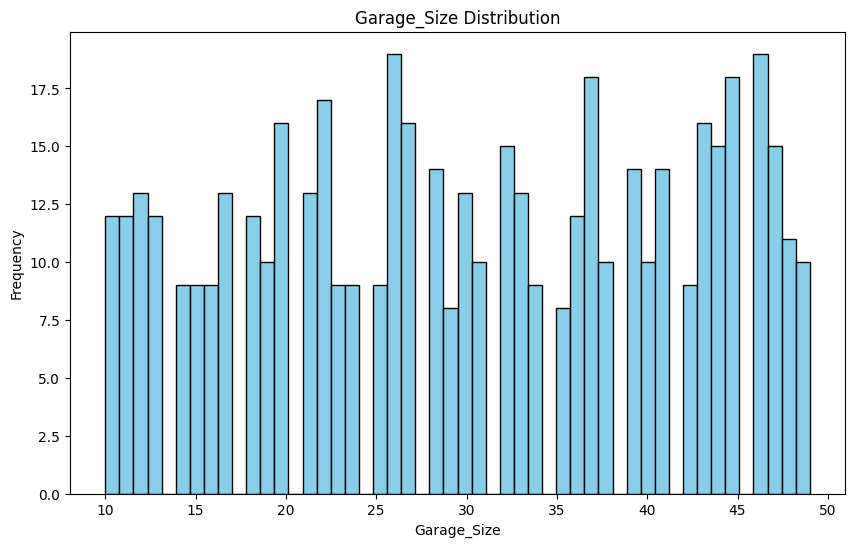

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(df['Garage_Size'], bins=50, color='skyblue', edgecolor='black')
plt.title('Garage_Size Distribution')
plt.xlabel('Garage_Size')
plt.ylabel('Frequency')
plt.show()

### **Has_Pool**

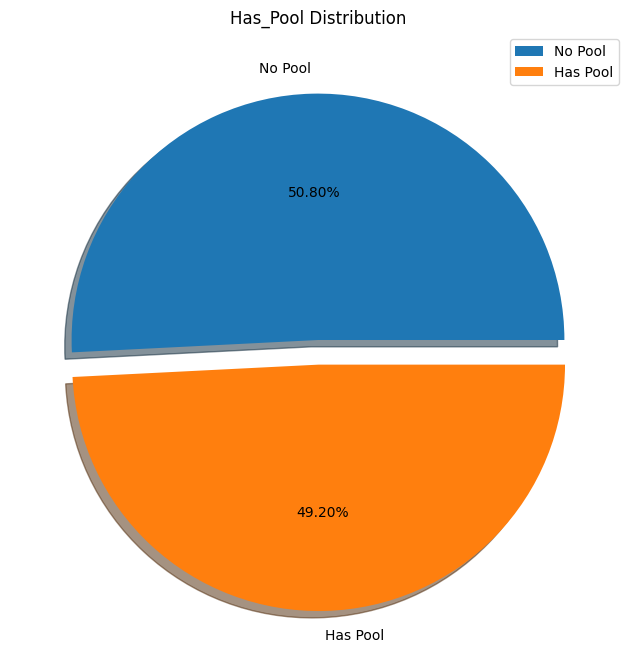

In [81]:
plt.figure(figsize=(10, 8))
labels = ['No Pool', 'Has Pool']
plt.pie( df['Has_Pool'].value_counts(),explode=[0, 0.1], labels=labels, shadow=True, autopct="%1.2f%%")
plt.title('Has_Pool Distribution')
plt.legend()
plt.show()

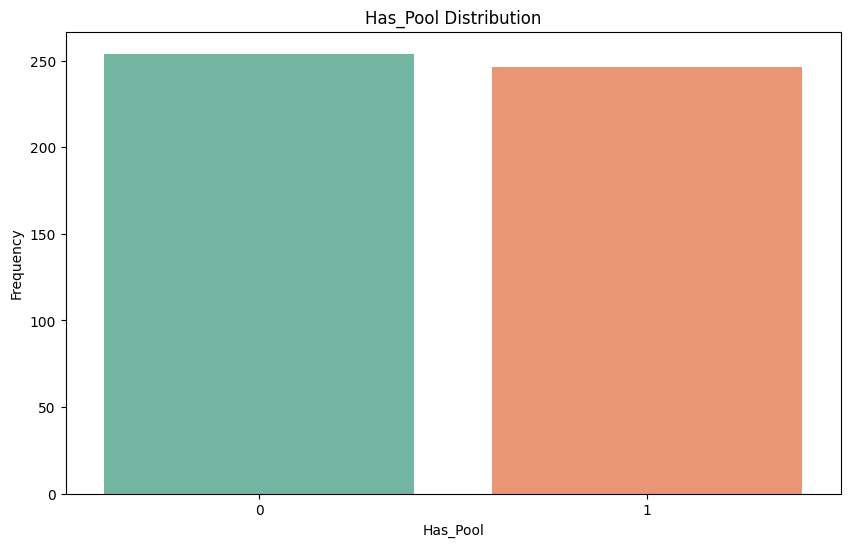

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Has_Pool'].value_counts().index, y=df['Has_Pool'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Has_Pool Distribution')
plt.xlabel('Has_Pool')
plt.ylabel('Frequency')

plt.show()

### **Has_Garden**

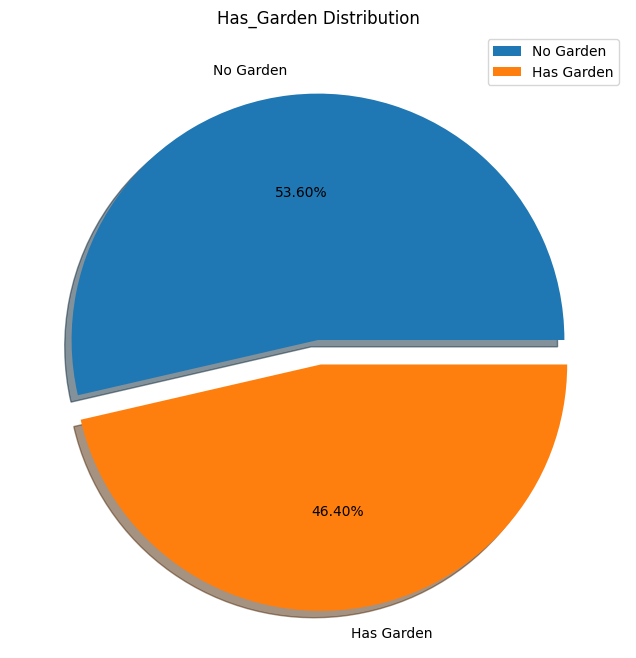

In [83]:
plt.figure(figsize=(10, 8))
labels = ['No Garden', 'Has Garden']
plt.pie(df['Has_Garden'].value_counts(), explode=[0, 0.1], labels=labels, shadow=True, autopct="%1.2f%%")
plt.title('Has_Garden Distribution')
plt.legend(labels)
plt.show()


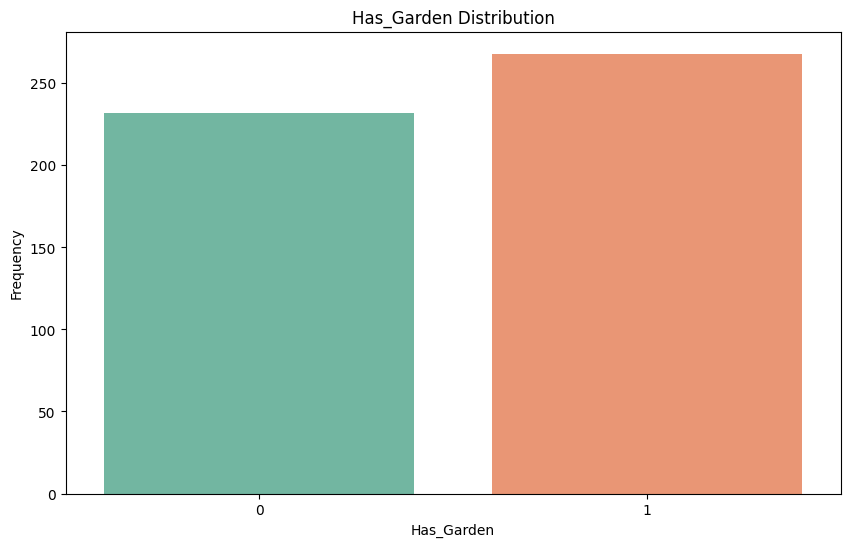

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Has_Garden'].value_counts().index, y=df['Has_Garden'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Has_Garden Distribution')
plt.xlabel('Has_Garden')
plt.ylabel('Frequency')

plt.show()

### **Bivalarite**

In [85]:
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


### **Has_Garden vs Price**

In [132]:
bi1 =df.groupby(['Has_Garden'])['Price'].mean().sort_values(ascending=False)


In [131]:
pd.DataFrame(bi1)

,Price
Has_Garden,
1,594619.890577
0,567873.638318


### **Has_Pool vs Price**

In [133]:
bi2 =df.groupby(['Has_Pool'])['Price'].mean().sort_values(ascending=False)

In [135]:
pd.DataFrame(bi2)

,Price
Has_Pool,
1,599162.030260
0,565791.162678


### **Distance_to_Center vs Price**

In [136]:
bi3 =df.groupby(['Distance_to_Center'])['Price'].mean().sort_values(ascending=False)


In [137]:
pd.DataFrame(bi3)

,Price
Distance_to_Center,
13.094182,960678.274291
13.945508,909199.560366
18.332066,885909.215276
12.692785,875352.545188
8.371646,867558.296769
...,...
9.882953,299387.116387
7.530606,298871.665267
17.837862,291630.925913


### **Location_Score vs Price**

In [138]:
bi4 =df.groupby(['Location_Score'])['Price'].mean().sort_values(ascending=False)

In [139]:
pd.DataFrame(bi4)

,Price
Location_Score,
9.037576,960678.274291
7.608543,909199.560366
8.180267,885909.215276
9.373784,875352.545188
6.322166,867558.296769
...,...
5.600917,299387.116387
8.849643,298871.665267
9.349944,291630.925913


### **Square_Feet vs Price**

In [140]:
bi5 =df.groupby(['Square_Feet'])['Price'].mean().sort_values(ascending=False)


In [141]:
pd.DataFrame(bi5)

,Price
Square_Feet,
277.066471,960678.274291
284.874735,909199.560366
210.507912,885909.215276
266.544036,875352.545188
272.785778,867558.296769
...,...
116.300592,299387.116387
72.821669,298871.665267
81.765128,291630.925913


### ****Multivariate****

### **Location_Score VS Distance_to_Center VS Price** 

In [142]:
set1=df.groupby(['Location_Score', 'Distance_to_Center'])['Price'].mean().sort_values(ascending=False)


In [143]:
pd.DataFrame(set1)

,,Price
Location_Score,Distance_to_Center,
9.037576,13.094182,960678.274291
7.608543,13.945508,909199.560366
8.180267,18.332066,885909.215276
9.373784,12.692785,875352.545188
6.322166,8.371646,867558.296769
...,...,...
5.600917,9.882953,299387.116387
8.849643,7.530606,298871.665267
9.349944,17.837862,291630.925913


### **Square_Feet VS Distance_to_Center VS Price** 

In [144]:

set2=df.groupby(['Square_Feet', 'Distance_to_Center'])['Price'].mean().sort_values(ascending=False)

In [145]:
pd.DataFrame(set2)

,,Price
Square_Feet,Distance_to_Center,
277.066471,13.094182,960678.274291
284.874735,13.945508,909199.560366
210.507912,18.332066,885909.215276
266.544036,12.692785,875352.545188
272.785778,8.371646,867558.296769
...,...,...
116.300592,9.882953,299387.116387
72.821669,7.530606,298871.665267
81.765128,17.837862,291630.925913


### **Location_Score VS Num_Floors VS Price** 

In [146]:
set3=df.groupby(['Location_Score', 'Num_Floors'])['Price'].mean().sort_values(ascending=False)


In [147]:
pd.DataFrame(set3)

,,Price
Location_Score,Num_Floors,
9.037576,3,960678.274291
7.608543,2,909199.560366
8.180267,2,885909.215276
9.373784,3,875352.545188
6.322166,2,867558.296769
...,...,...
5.600917,1,299387.116387
8.849643,2,298871.665267
9.349944,1,291630.925913


### **Has_Pool VS Has_Garden VS Price** 

In [154]:
set4=df.groupby(['Has_Pool','Has_Garden'])['Price'].mean().sort_values(ascending=False)

In [155]:
pd.DataFrame(set4)

Price
Has_Pool Has_Garden               
1        1           618164.206888
         0           580767.923285
0        1           575239.875110
         0           552810.221300

### **Num_Bedrooms VS Num_Bathrooms VS Num_Floors VS Price** 

In [159]:
set5= df.groupby(['Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors'])['Price'].mean().sort_values(ascending=False)

In [160]:
pd.DataFrame(set5)

Price
Num_Bedrooms Num_Bathrooms Num_Floors               
5            3             3           827239.346036
                           2           770206.795509
             2             3           694060.751996
4            3             2           690692.823755
3            3             3           689609.056290
4            3             3           682793.660722
5            2             2           680785.682908
4            1             3           679485.323501
5            3             1           668791.821526
             1             3           665406.818818
             2             1           642475.132517
4            2             1           633584.535763
5            1             1           629583.533616
4            1             1           627433.684064
             2             3           624735.503659
5            1             2           619830.482335
3            3             2           616929.482272
                           1           615620.647721
4            3             1           604297.885415
3            1             3           593215.524381
             2             3           585401.831630
4            2             2           584101.473699
             1             2           583455.636461
3            2             2           574434.292968
                           1           566672.445718
             1             2           564555.423529
1            3             3           560419.934398
2            1             3           558118.154981
             3             1           555434.516595
             2             3           555366.849711
                           2           532463.811751
             3             2           531791.659489
                           3           531605.315458
1            3             2           530363.113857
             1             3           527243.190015
3            1             1           520516.275902
2            2             1           514617.430080
1            2             2           512093.313872
2            1             2           511724.428944
1            2             3           505413.841597
             3             1           473733.585169
2            1             1           471319.342059
1            1             1           465081.724985
             2             1           429752.477274
             1             2           417797.998791

### **Square_Feet VS Num_Floors VS Price** 

In [156]:
set6=df.groupby(['Square_Feet', 'Num_Floors'])['Price'].mean().sort_values(ascending=False)

In [157]:
pd.DataFrame(set6)

,,Price
Square_Feet,Num_Floors,
277.066471,3,960678.274291
284.874735,2,909199.560366
210.507912,2,885909.215276
266.544036,3,875352.545188
272.785778,2,867558.296769
...,...,...
116.300592,1,299387.116387
72.821669,2,298871.665267
81.765128,1,291630.925913


## **Data Preprocessing**

#### **Drop Unneeded Columns**

In [96]:
## not needed

In [97]:
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


#### **Define Features X and Tanget y**

In [98]:
X = df.drop(columns=['Price'])
y = df['Price']

In [99]:
X

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277
...,...,...,...,...,...,...,...,...,...,...
495,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583
496,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105
497,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264
498,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684


In [100]:
y

0      602134.816747
1      591425.135386
2      464478.696880
3      583105.655996
4      619879.142523
           ...      
495    488496.350722
496    657736.921717
497    405324.950201
498    773035.968028
499    864299.500218
Name: Price, Length: 500, dtype: float64

#### **Data Encoding**

In [101]:
# not needed

#### **Data Scaling**

In [103]:
X.shape

(500, 10)

In [104]:
X[['Square_Feet']].shape


(500, 1)

In [105]:
scaler = MinMaxScaler()

X['Square_Feet'] = scaler.fit_transform(X[['Square_Feet']])

In [106]:
X

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
0,0.374003,1,3,3,1967,1,1,48,8.297631,5.935734
1,0.957232,1,2,1,1949,0,1,37,6.061466,10.827392
2,0.735834,1,3,2,1923,1,0,14,2.911442,6.904599
3,0.600865,5,2,2,1918,0,0,17,2.070949,8.284019
4,0.152806,4,3,3,1999,1,0,34,1.523278,14.648277
...,...,...,...,...,...,...,...,...,...,...
495,0.352555,2,2,2,1967,1,0,16,4.296086,5.562583
496,0.585679,2,3,1,1977,0,1,45,7.406261,2.845105
497,0.073563,1,1,2,2004,0,0,18,8.629724,6.263264
498,0.981203,5,1,3,1940,1,0,41,5.318891,16.990684


#### **Data Splitting**

In [107]:
[1, 2, 3, 4, 5, 6]
rs=42

[4, 5, 3, 1, 2, 6]

rs=3
[5, 6, 4, 3, 1, 2]


[5, 6, 4, 3, 1, 2]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [170]:
X_test.shape

(100, 10)

In [175]:
X_train.shape

(400, 10)

In [174]:
y_test.shape

(100,)

In [176]:
y_train.shape

(400,)

## **Data Modeling**

In [110]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = lr.predict(X_test)

In [112]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  437730359.708275
mean_absolute_error: 16850.995604842257


In [113]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

SGDRegressor()

In [114]:
y_pred = sgd.predict(X_test)

In [115]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  5.8459612104365986e+29
mean_absolute_error: 764465506659498.1


In [116]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [117]:
y_pred = lasso.predict(X_test)

In [118]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  437780352.2619097
mean_absolute_error: 16852.258620350975


In [119]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [120]:
y_pred = ridge.predict(X_test)

In [121]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  456912456.5279761
mean_absolute_error: 17272.058373495754
